In [68]:
import pandas as pd
import numpy as np
import datetime as dt
import re

In [69]:
model_df =  pd.read_csv("model_ski_df.csv", usecols = range(1,7))
model_df.head()

,style,host_country,bc_dist,bc_pace,bc_nski,month
0,CT,ARG,8.775961,2.471600,14.721642,12
1,CT,ARG,8.775961,2.388236,14.721642,12
2,CT,ARG,8.775961,2.332943,14.721642,12
3,CT,ARG,8.775961,2.328083,14.721642,12
4,CT,ARG,8.775961,2.322862,14.721642,12


In [70]:
# filter by ski-style as these are different races
import math
classic = model_df[model_df['style']=='CT'].copy()
print("number of classic racers: " + str(len(classic)))
print("sqrt(n) for K-neighbors, classic: " + str(math.sqrt(len(classic))))
skate = model_df[model_df['style']=='FT'].copy()
print("number of skate racers: " + str(len(skate)))
print("sqrt(n) for K-neighbors, skate: " + str(math.sqrt(len(skate))))

#in the interest of quicker computation time, let's subset the 
classic_sub = classic.sample(n=143832, random_state=9)
print("number of classic racers, subset: " + str(len(classic_sub)))


number of classic racers: 469296
sqrt(n) for K-neighbors, classic: 685.05182285722
number of skate racers: 143832
sqrt(n) for K-neighbors, skate: 379.2518951831355
number of classic racers, subset: 143832


## Classic skiing KNN model training

In [71]:
import numpy as np
from sklearn.model_selection import train_test_split

# create attribute matrix (bc_dist, bc_pace, bc_nski) and target (host_country) 
ski_data = np.array(classic_sub.iloc[:,[2,3,4]]) 
host = np.array(classic_sub.host_country) 

# setup train and test sets
ski_data_train, ski_data_test, host_train, host_test = train_test_split(ski_data, host, test_size=0.20, random_state=9)

In [72]:
#now, test k iteratively starting with classic
#note, sqrt(n) printouts above

from sklearn.model_selection import cross_val_score

k_neighbors = [n for n in range(1,1000, 100) if n % 2 != 0] #start in 100s & avoid ties using odd neighbors

ct_cv_scores = []

In [73]:
# computation step commented out below, uncomment to run

from sklearn.neighbors import KNeighborsClassifier

for i in k_neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, ski_data_train, host_train, cv=10, scoring='accuracy', n_jobs = -1)
    ct_cv_scores.append(scores.mean())

In [74]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

The optimal number of neighbors is 1


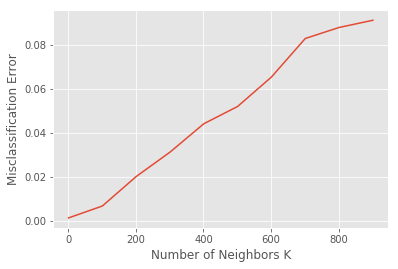

In [75]:
# changing to misclassification error
MSE = [1 - x for x in ct_cv_scores]

# determining best k
optimal_k = k_neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(k_neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [76]:
# repeat 10-fold CV with finer detail 
k_neighbors_2 = [n for n in range(1,100,2)] 
ct_cv_scores_2 = []

In [77]:
#computation step, uncomment to run

# for i in k_neighbors_2:
#     knn = KNeighborsClassifier(n_neighbors=i)
#     scores = cross_val_score(knn, ski_data_train, host_train, cv=10, scoring='accuracy', n_jobs = -1)
#     ct_cv_scores_2.append(scores.mean())

The optimal number of neighbors is 7


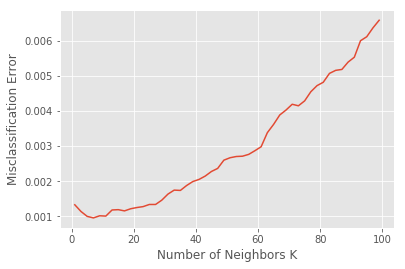

In [78]:
# changing to misclassification error
MSE_2 = [1 - x for x in ct_cv_scores_2]

# determining best k
optimal_k_2 = k_neighbors_2[MSE_2.index(min(MSE_2))]
print ("The optimal number of neighbors is %d" % optimal_k_2)

# plot misclassification error vs k
plt.plot(k_neighbors_2, MSE_2)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

## Freestyle (skate) skiing model training

In [79]:
# create attribute matrix (bc_dist, bc_pace) and target (host_country) 
skate_data = np.array(skate.iloc[:,[2,3]]) 
skate_host = np.array(skate.host_country) 

# setup train and test sets
skate_data_train, skate_data_test, skate_host_train, skate_host_test = train_test_split(skate_data, skate_host, test_size=0.20, random_state=9)

In [80]:
k_neighbors_3 = [n for n in range(1,1000, 100) if n % 2 != 0] #start in 100s & avoid ties using odd neighbors
cv_scores_3 = []

In [81]:
# computation step commented out below, uncomment to run

# for i in k_neighbors_3:
#     knn = KNeighborsClassifier(n_neighbors=i)
#     scores = cross_val_score(knn, skate_data_train, skate_host_train, cv=10, scoring='accuracy', n_jobs = -1)
#     cv_scores_3.append(scores.mean())

The optimal number of neighbors is 101


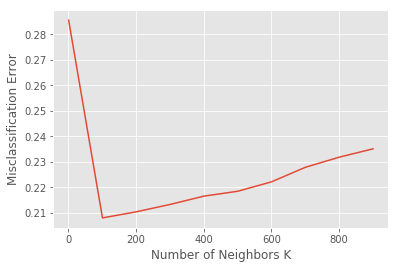

In [82]:
# changing to misclassification error
MSE_3 = [1 - x for x in ct_cv_scores_3]

# determining best k
optimal_k = k_neighbors[MSE_3.index(min(MSE_3))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(k_neighbors_3, MSE_3)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [83]:
# repeat 10-fold CV with finer detail 
k_neighbors_4 = [n for n in range(1,200, 4)] 
cv_scores_4 = []

In [84]:
# computation step, uncomment to run

# for i in k_neighbors_4:
#     knn = KNeighborsClassifier(n_neighbors=i)
#     scores = cross_val_score(knn, skate_data_train, skate_host_train, cv=10, scoring='accuracy', n_jobs = -1)
#     cv_scores_4.append(scores.mean())

The optimal number of neighbors is 73


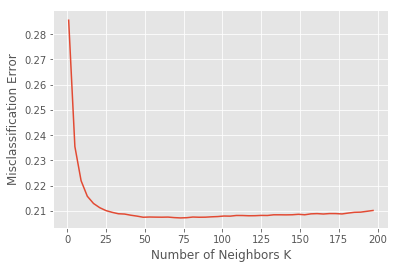

In [85]:
# changing to misclassification error
MSE_4 = [1 - x for x in cv_scores_4]

# determining best k
optimal_k = k_neighbors_4[MSE_4.index(min(MSE_4))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(k_neighbors_4, MSE_4)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# Closing thoughts & directions for shiny app

#### Takeaways:
- One surprising takeway from these simulations is that the K with the lowest misclassification error is far below sqrt(n). 
- The lowest misclassification error for classic uses K=7 neighbors while skate uses K=73. 
- I'll meet in the 'middle' at K=39 in the initial app deployment - a value that works well for both cases.

Question:
- What is the implication of 'better classification' (91% vs 79% accuracy) of the classic vs skate datasets? 
    - My initial conjecture is that these pacetimes/distances better stratified than the skate dataset.
    
Stretch goals for the app include:
- Fancy output (scrape images of flags/logos & social media links)
- Month filtering (beta!)

### Recall: 
- dist_lambda = 0.37763
- pace_lambda = -0.142847
- nski_lambda = 0.528469

# Write final df for R app

In [86]:
final_model_df = pd.concat([classic_sub, skate])
final_model_df.head(10)
#final_model_df.to_csv("ski_knn_model.csv")